# 04_logistic_regression
로지스틱회귀 

In [2]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')


In [3]:
fish_df = pd.read_csv('./fish_data.csv')
fish_df.head(), pd.unique(fish_df['Species'])

(  Species  Weight  Length  Diagonal   Height   Width
 0   Bream   242.0    25.4      30.0  11.5200  4.0200
 1   Bream   290.0    26.3      31.2  12.4800  4.3056
 2   Bream   340.0    26.5      31.1  12.3778  4.6961
 3   Bream   363.0    29.0      33.5  12.7300  4.4555
 4   Bream   430.0    29.0      34.0  12.4440  5.1340,
 array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
       dtype=object))

In [ ]:
# 데이터셋 분리
X = fish_input = fish_df[[ 'Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
y = fish_df['Species'].to_numpy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#스케일링(훈련 셋에서 사용한 기준으로 테스트셋을 스케일링해야함.)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train= ss.transform(X_train)
X_test= ss.transform(X_test)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
# 주변 3개의 생선을 보고 확률을 계산 
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train, y_train)
# 훈련데이터 예측 정확도            # 새로운 테스트데이터에 얼마나 잘 일반화되는지 나타냄 
kn.score(X_train, y_train), kn.score(X_test, y_test)
# 훈련데이터 정확도에 비해 테스트 데이터 정확도가 약간 낮아서 모델이 과적합 되었을 가능성이 있음. 

(0.8907563025210085, 0.85)

In [7]:
# KN 분류기가 분류해내는 클래스 목록 
print(kn.classes_)
#테스트셋에서 앞 5개의 데이터를 예측하라
print(kn.predict(X_test[:5]))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [17]:
# 테스트 데이터 5개가 특정 생선일 확률 
kn.predict_proba(X_test[:5]) # 각 예측에 대한 클래스별 확률 보여줌 
#결과해석 
                        #Perch 로 예측할 확률 100%
                                        #perch로 예측할 확률 66.7 / smelt로 예측할 확률이 33.3%이다.
   #즉, KNNdml n_neighbors=3 이므로, 가장가까운 3개 이웃중 2개는 perch, 1개는 smelt 였다.                                   
            

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]])

# 로지스틱 회귀 
확률을 구할 때 시그모이드 함수를 사용해서 0~1로 변환한다.

- 이진분류 문제에 자주사용되는 통계적 모델
- 주요 장점
    * 해석 용이성: 모델의 각 계수(cofficient)가 특정 입력 변수가 결과에 미치는 영향의 방향과 크기를 지ㄱ접적으로 나타냄
    * 대규모 데이터셋에서도 계산비용이 적음
    * 확률 예측: 특정 클래스에 속할 **확률값0~1** 사이를 제공한다. 의사결정 신뢰도 판단에 유용 

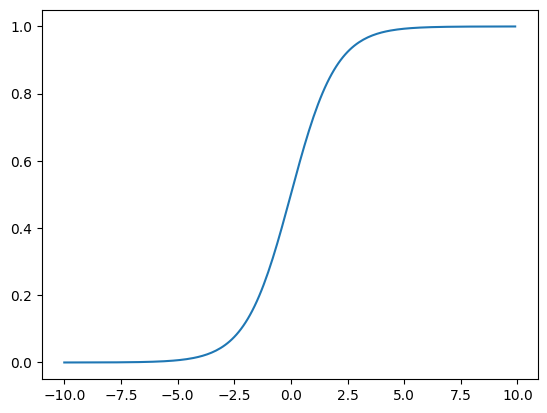

In [9]:
import matplotlib.pyplot as plt
# 시그모이드 함수 (모든 x를 0~1 사이 값으로 변환)
z= np.arange(-10, 10, 0.1)

phi = 1 / (1 + np.exp(-z))
plt .plot(z,phi)
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
ss.fit(X_train)
X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)


index = (y_train == 'Bream') | (y_train == 'Smelt')

X_bream_smelt_train = X_train_s[index]
y_bream_smelt_train = y_train[index]


In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# 로지스틱회귀 학습 -> 방정식 만들기 -> 두개중 하나로 분류해야 함 -> abc순 뒤에걸로 분류할 점수를 계산하는 식
lr.fit(X_bream_smelt_train, y_bream_smelt_train)
print(f'=== 방정식 기울기, 절편 결과 : {lr.coef_} / {lr.intercept_}')
# 분류하는 클래스 명
print(f'\n 분류해낼 클래스 두개 (abc순) -> {lr.classes_}')

# 도미/빙어 예측 결과
print(lr.predict(X_bream_smelt_train[:5]))

# 실제 z값
descions = lr.decision_function(X_bream_smelt_train[:5])
print(f'\n=== 실제z값 ({lr.coef_}) ===')
print(descions)

# 직접 시그모이드 통과시키기
from scipy.special import expit
print('\n=== 시그모이드 함수 통과 후 값 (직접확인) ===')
print(expit(descions))

# 바로 계산된 결과
print('\n=== lr 이 바로 계산해준 값 ===')
print(lr.predict_proba(X_bream_smelt_train[:5]))

=== 방정식 기울기, 절편 결과 : [[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] / [-2.16172774]

 분류해낼 클래스 두개 (abc순) -> ['Bream' 'Smelt']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']

=== 실제z값 ([[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]]) ===
[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]

=== 시그모이드 함수 통과 후 값 (직접확인) ===
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]

=== lr 이 바로 계산해준 값 ===
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


- 로지스틱 회귀 : 이진 문제를 풀기 위해서 사용되고, 결과를 시그모이드 함수 사이에 통과시켜서 특정 클래스에 속할 확률을 예측한다. 출력은 예측 확률 이고, 0.5 기준으로 분류 된다. (이준분류와 다중클래스 분류에 활용된다.)
데이터 준비 -> 데이터 분할과 표준화(스케일링) -> KNN 분류 -> 시그모이드 함수 시각화 -> 로지스틱 회귀 적용(특정 두 종류만 분류)

### 1차 정리 
- 로지스틱 회귀: 분류 문제를 풀기 위해 사용. 결과를 시그모이드 함수(0~1 사이 확률 값으로 변환)에 통과시켜서 특정 클래스에 속할 확률을 예측한다. 출력은 " 예측 확률 이고 , 보통 0.5 기준으로 분류 된다. 
- 주로 사용되는 곳은 이진 분류 와 다중 클래스 분류 등에 활용된다. 

좋은 코드예요 👍 제가 전체 흐름을 정리해드릴게요.

⸻

1️⃣ 데이터 준비

fish_df = pd.read_csv('./fish_data.csv')
X = fish_df[[ 'Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
y = fish_df['Species'].to_numpy()

	•	생선 데이터셋(fish_data.csv)을 불러옴
	•	입력 데이터 X: 생선의 무게, 길이, 대각선, 높이, 두께 (5개 특성)
	•	타겟 y: 생선 종류(Species)

⸻

2️⃣ 데이터 분할 + 표준화(스케일링)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

	•	데이터를 훈련/테스트 세트로 나눔
	•	StandardScaler로 특성들을 표준화(평균 0, 분산 1)

⸻

3️⃣ KNN 분류

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train, y_train)
kn.score(X_train, y_train), kn.score(X_test, y_test)

	•	KNN(K-최근접이웃) 모델 학습 → n_neighbors=3 이므로 주변 3개의 이웃으로 분류
	•	훈련/테스트 정확도 확인
	•	kn.predict() / kn.predict_proba() 로 클래스 예측 및 확률 확인 predict_proba,  함수는 분류 모델이 각 클래스 속할 확률을 예측해 주는 함수이다. 

👉 여기까지는 **“주어진 생선 데이터에서, 이 생선이 어떤 종류인지 이웃을 보고 분류”**하는 실험이에요.


- predict_proba 함수(분류 모델이 각 클래스에 속할 확률을 예측해 주는 함수이다.)
	•	입력 데이터(X_test)를 넣으면, 각 샘플이 모든 클래스에 속할 확률 분포를 반환합니다.
	•	반환 값은 2차원 배열이며,
	•	행(row) → 샘플 개수
	•	열(column) → 클래스 개수
	•	각 행의 확률은 반드시 합이 1이 됩니다.
⸻

4️⃣ 시그모이드 함수 시각화

z = np.arange(-10, 10, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.show()

	•	시그모이드 함수(0~1 사이로 값 변환)를 그려서, 확률 해석이 가능함을 보여줌
	•	즉, “선형 모델의 출력을 확률로 변환” 개념을 이해하려는 단계

⸻

5️⃣ 로지스틱 회귀 적용 (특정 두 종만 분류)

index = (y_train == 'Bream') | (y_train == 'Smelt')
X_bream_smelt_train = X_train_s[index]
y_bream_smelt_train = y_train[index]

lr = LogisticRegression()

	•	여러 생선 중에서 도미(Bream)와 빙어(Smelt)만 선택
	•	이진 분류 문제로 단순화해서 **로지스틱 회귀(Logistic Regression)**를 적용하려고 준비 중

⸻

✅ 정리하면
당신은 지금
	1.	KNN 분류기로 여러 생선 종류를 분류해보고,
	2.	확률 해석을 위해 시그모이드 함수를 직접 그려본 뒤,
	3.	여러 클래스 중에서 **특정 2개 클래스(Bream vs Smelt)**만 뽑아서 로지스틱 회귀로 이진 분류 실습을 하려는 거예요.

⸻

혹시 제가 이어서 lr.fit(X_bream_smelt_train, y_bream_smelt_train) 실행하고, **결과(계수, 예측 확률, 정확도)**까지 정리해드릴까요?

### 로지스틱 회귀로 다중분류(생선 7종) 

In [12]:
# 소프트맥스 함수 

In [13]:
# 2진 분류 vs 다중분류에 따라 내부 동작이 다름 

# C = 규제,max_iter = 반복횟수의 제한 
lr = LogisticRegression(C= 20, max_iter=1000)
lr.fit(X_train_s, y_train)

print(lr.score(X_train_s, y_train))
print(lr.score(X_test_s, y_test))

0.9327731092436975
0.925


In [14]:
print(lr.predict(X_test_s[:5]))

# 분류의 근거 (확률_)
print(np.round(lr.predict_proba(X_test_s[:5]), decimals=3))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [15]:
# 각 생선별 z값 구하는 함수의 계수 확인 

lr.coef_

array([[-1.50605454, -1.03747913,  2.60919714,  7.69422736, -1.1860334 ],
       [ 0.19200048, -1.99988811, -3.79617726,  6.50312639, -2.00022756],
       [ 3.55793539,  6.36988929, -8.52233732, -5.75397234,  3.79233439],
       [-0.11453307,  3.61060121,  3.94464503, -3.62243903, -1.75981681],
       [-1.40843715, -6.0924219 ,  5.28629633, -0.86696568,  1.84518453],
       [-1.33419959,  1.48153394,  1.38217548, -5.6602348 , -4.39228961],
       [ 0.61328848, -2.33223529, -0.90379941,  1.70625808,  3.70084847]])

In [19]:
# Z 값으로 보기
decisions = lr.decision_function(X_test_s[:3])
print(np.round(decisions, decimals=2))

# # 소프트맥스 함수에 넣어서 확률로 바꾸기
from scipy.special import softmax
proba = softmax(decisions, axis=1)
print(np.round(proba, decimals=3))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]]
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]]


# 여기까지 정리
좋습니다 🙂 지금 작성하신 코드를 단계별로 뜯어보면서 무엇을 하고 있는지, 어떤 의도를 가진 코드인지 설명해드릴게요.

⸻

1. 모델 선언

lr = LogisticRegression(C=20, max_iter=1000)

	•	LogisticRegression: 로지스틱 회귀 분류 모델을 사용.
	•	C=20: 규제(regularization) 세기를 조절하는 하이퍼파라미터. 값이 클수록 규제가 약해지고, 모델이 더 복잡해질 수 있음.
	•	max_iter=1000: 학습을 반복하는 최대 횟수. 데이터와 파라미터에 따라 기본값(100)이 부족할 수 있어서 늘려줌.

👉 의도: 규제가 너무 강하지 않게 하고 충분히 수렴할 수 있도록 반복 횟수를 늘려서 학습 안정성을 확보하려는 것.

⸻

2. 모델 학습

lr.fit(X_train_s, y_train)

	•	X_train_s: 스케일링된 훈련 데이터(아마 StandardScaler 등으로 표준화한 것).
	•	y_train: 정답 레이블(클래스).

👉 훈련 데이터로 모델을 학습시킴.

⸻

3. 정확도 확인

print(lr.score(X_train_s, y_train))
print(lr.score(X_test_s, y_test))

	•	score: 분류 문제에서는 기본적으로 정확도(accuracy) 반환.
	•	훈련 세트와 테스트 세트 정확도를 확인해서 모델이 얼마나 잘 학습됐는지, 과적합 여부를 확인할 수 있음.

👉 훈련 정확도와 테스트 정확도를 비교하면서 모델이 일반화 잘 되는지 체크하려는 것.

⸻

4. 예측값 확인

print(lr.predict(X_test_s[:5]))

	•	테스트 데이터의 앞 5개 샘플에 대한 클래스 예측값을 보여줌.
	•	예: ['Bream' 'Smelt' 'Bream' ...] 같은 식으로 레이블이 출력될 것.

👉 실제 데이터가 어떤 클래스로 분류되는지 확인하려는 것.

⸻

5. 예측 근거(확률) 확인

print(np.round(lr.predict_proba(X_test_s[:5]), decimals=3))

	•	predict_proba: 각 샘플이 각 클래스에 속할 확률을 출력.
	•	2진 분류라면 [클래스0일 확률, 클래스1일 확률] 형태.
	•	예: [[0.23, 0.77], [0.91, 0.09], ...]

👉 단순히 결과만 보는 게 아니라, 모델이 얼마나 확신을 가지고 분류했는지를 보고 싶어서 확률을 확인하는 것.

⸻

6. 결정 함수 값 확인

decisions = lr.decision_function(X_test_s[:5])
np.round(decisions, decimals=2)

	•	decision_function: 로지스틱 회귀에서 시그모이드 함수 적용 전 점수(로그 오즈, logit) 를 반환.
	•	2진 분류의 경우:
	•	음수 → 클래스 0 쪽으로 기울음
	•	양수 → 클래스 1 쪽으로 기울음
	•	절댓값이 클수록 모델이 더 강하게 확신한다는 뜻.

👉 확률이 아닌 내부 선형 방정식 결과값(의사결정 점수) 를 보고 싶은 것.

⸻

💡 정리 (당신이 하려는 것)
	•	로지스틱 회귀를 2진 분류/다중 분류 상황에서 어떻게 동작하는지 확인하는 과정이에요.
	•	단순히 predict 결과만 보는 게 아니라
	•	score → 정확도 확인
	•	predict_proba → 분류 확률 근거 확인
	•	decision_function → 내부 의사결정 점수(시그모이드 입력값) 확인
을 통해 모델이 어떤 논리로 분류했는지 해석하려는 목적이 있습니다.

⸻

👉 혹시 제가 이어서, 2진 분류일 때 decision_function 값이 확률로 변환되는 과정(시그모이드 공식) 까지 수학적으로 정리해드릴까요?

# Z값 (결정 함수) 생성
1. 필요한이유: 로지스틱 회귀가 이진분류 모델이기때문에 이진 분류 모델을 확장하기 위함. 
- 로지스틱 회귀 모델은 각 클래스에 대한 Z 값, 즉**결정함수(decision function)**을 계산한다. 
- Z 값은 양수, 음수모두 가능하고 크기가 클수록 모델의 예측확신이 높음을 의미한다. 
    * 위의 코드는 테스트 데이터 3개에 대해 각 클래스(셍선 7종) 별로 Z값을 계산한다. 

2. 소프트맥스 함수 변환: Z값은 그대로는 확률로 해석이 불가함. 따라서 Z 값을 모든 클래스에 대한 확률로 변환하기 위해 소프트맥스 함수가 사용됨 
* 소프트 맥스 함수 변환 과정
    1. 각 Z값을 0과 1사이의 값으로 변환 
    2. 모든 클래스의 확률을 합하면 1이되도록 정규화
    3. 가장 큰 Z값이 가장 큰 확률을 갖도록 하여 Z 값의 순서를 유지 
    --> 생선이 이종류일 거라고 예측하는 것을 넘어 이생선이 특정 종류일 확률은 몇 % 이다 와 같은 예측 신뢰도 제공 